# Income Group prediction

## Problem Description
The given data contains details of various markers and financial ratios of entities. Target variable is whether the company got bankrupt in the subsequent years or not. 1 – bankrupt, 0 - not bankrupt

## Anlaytics Objectives
Not defined

## Data Set Description
1.	Attr1	net profit / total assets 
2.	Attr2	total liabilities / total assets 
3.	Attr3	working capital / total assets 
4.	Attr4	current assets / short-term liabilities 
5.	Attr5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 
6.	Attr6	retained earnings / total assets 
7.	Attr7	EBIT / total assets 
8.	Attr8	book value of equity / total liabilities 
9.	Attr9	sales / total assets 
10.	Attr10	equity / total assets 
11.	Attr11	(gross profit + extraordinary items + financial expenses) / total assets 
12.	Attr12	gross profit / short-term liabilities 
13.	Attr13	(gross profit + depreciation) / sales 
14.	Attr14	(gross profit + interest) / total assets 
15.	Attr15	(total liabilities * 365) / (gross profit + depreciation) 
16.	Attr16	(gross profit + depreciation) / total liabilities 
17.	Attr17	total assets / total liabilities 
18.	Attr18	gross profit / total assets 
19.	Attr19	gross profit / sales 
20.	Attr20	(inventory * 365) / sales 
21.	Attr21	sales (n) / sales (n-1) 
22.	Attr22	profit on operating activities / total assets 
23.	Attr23	net profit / sales 
24.	Attr24	gross profit (in 3 years) / total assets 
25.	Attr25	(equity - share capital) / total assets 
26.	Attr26	(net profit + depreciation) / total liabilities 
27.	Attr27	profit on operating activities / financial expenses 
28.	Attr28	working capital / fixed assets 
29.	Attr29	logarithm of total assets 
30.	Attr30	(total liabilities - cash) / sales 
31.	Attr31	(gross profit + interest) / sales 
32.	Attr32	(current liabilities * 365) / cost of products sold 
33.	Attr33	operating expenses / short-term liabilities 
34.	Attr34	operating expenses / total liabilities 
35.	Attr35	profit on sales / total assets 
36.	Attr36	total sales / total assets 
37.	Attr37	(current assets - inventories) / long-term liabilities 
38.	Attr38	constant capital / total assets 
39.	Attr39	profit on sales / sales 
40.	Attr40	(current assets - inventory - receivables) / short-term liabilities 
41.	Attr41	total liabilities / ((profit on operating activities + depreciation) * (12/365)) 
42.	Attr42	profit on operating activities / sales 
43.	Attr43	rotation receivables + inventory turnover in days 
44.	Attr44	(receivables * 365) / sales 
45.	Attr45	net profit / inventory 
46.	Attr46	(current assets - inventory) / short-term liabilities 
47.	Attr47	(inventory * 365) / cost of products sold 
48.	Attr48	EBITDA (profit on operating activities - depreciation) / total assets 
49.	Attr49	EBITDA (profit on operating activities - depreciation) / sales 
50.	Attr50	current assets / total liabilities 
51.	Attr51	short-term liabilities / total assets 
52.	Attr52	(short-term liabilities * 365) / cost of products sold) 
53.	Attr53	equity / fixed assets 
54.	Attr54	constant capital / fixed assets 
55.	Attr55	working capital 
56.	Attr56	(sales - cost of products sold) / sales 
57.	Attr57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) 
58.	Attr58	total costs /total sales 
59.	Attr59	long-term liabilities / equity 
60.	Attr60	sales / inventory 
61.	Attr61	sales / receivables 
62.	Attr62	(short-term liabilities *365) / sales 
63.	Attr63	sales / short-term liabilities 
64.	Attr64	sales / fixed assets

## Considerations
1. While reading the data set replace the 'NA' as NAs

## Algorithm Class
Classification as we are predicting low or high income group, 0/1.

## Given constarints
1. Target variable is whether the company got bankrupt in the subsequent years or not.
2. 1 – bankrupt, 0 - not bankrupt
3. The target column name in your submission.csv should be "prediction".
4. Precision and Recall are auxiliary metrics for your information. F1 score will be considered for evaluation.


## Import libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
import warnings

from tqdm import tqdm
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
import seaborn as sns
import random
from string import ascii_letters
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, recall_score,precision_score,precision_recall_curve,average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import roc_curve, auc,confusion_matrix,mean_absolute_error,mean_squared_error,roc_auc_score,f1_score
from sklearn.preprocessing import binarize
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as impipe
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedKFold
import matplotlib.ticker as ticker
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
import itertools
import os



In [2]:
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True'
random.seed(777)

## Import required data


In [3]:
bankruptcyData=pd.read_csv("/Users/samyam/Documents/Samya/Insofe/insofe/CSE7305c_CUTe_ProblemDescription_and_Dataset/train.csv",na_values=["NA"])
print("The number of Rows in the Income Group data set  ="+str(bankruptcyData.shape[0]))
print("The number of Columns in the Income Group data set =" +str(bankruptcyData.shape[1]))


The number of Rows in the Income Group data set  =31283
The number of Columns in the Income Group data set =66


## Feature Analysis

__Columns names and check the datatypes of columns__

In [4]:
print("The columns in the data set are : \n",list(bankruptcyData.columns))

The columns in the data set are : 
 ['ID', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'target']


In [5]:
print("The data types of the columns are :\n\n",bankruptcyData.dtypes)

The data types of the columns are :

 ID          int64
Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
           ...   
Attr36    float64
Attr37    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58  

__Check the first and last 10 rows in dataset to get an understanding of data__

In [6]:
bankruptcyData.head()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,1,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,2,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,3,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,...,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,4,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,...,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,5,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,...,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


In [7]:
bankruptcyData.tail()

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
31278,31279,0.267320,0.407240,0.407810,2.0014,54.282,0.267320,0.343780,1.36560,1.1866,...,0.157230,0.480690,0.84277,0.0,194.1900,4.5757,67.793,5.3840,11.8550,0
31279,31280,0.022768,0.031973,0.903510,29.2590,266.830,0.000000,0.030024,30.27700,1.1493,...,0.033169,0.023520,0.97386,0.0,15.4430,6.1462,10.154,35.9450,17.8140,0
31280,31281,0.100200,0.529230,0.091546,1.1998,-14.525,0.000000,0.100200,0.88953,2.7151,...,0.007931,0.212850,0.96470,0.0,13.6860,10.8870,61.583,5.9270,6.0285,0
31281,31282,-0.079765,0.153710,0.694730,5.5198,63.382,-0.033106,-0.082183,5.18020,1.0052,...,0.005141,-0.100180,0.99486,0.0,3.0071,9.6707,40.344,9.0472,9.1750,0
31282,31283,0.021070,0.287240,0.649310,3.2605,85.325,0.517390,0.032398,2.05410,1.0030,...,0.002979,0.035712,0.99702,0.0,186.6700,5.7222,58.475,6.2420,28.2560,0


__Check the summary of dataframe__

In [8]:
bankruptcyData.describe(include="all")

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,31283.000000,31276.000000,31276.000000,31276.000000,31181.000000,3.122000e+04,31276.000000,31276.000000,31210.000000,31279.000000,...,3.118200e+04,31277.000000,3.121500e+04,31277.000000,2.971300e+04,31210.000000,3.118200e+04,31181.000000,30682.000000,31283.000000
mean,15642.000000,0.051612,0.551159,0.151249,7.321993,-1.706215e+02,-0.011735,0.120577,14.379693,2.783840,...,-3.637422e+01,-0.007774,4.067219e+01,1.677983,5.462892e+02,15.227988,1.640595e+03,9.656775,81.529420,0.048301
std,9030.768572,1.748230,4.510523,3.754494,347.736044,2.392279e+04,5.489446,6.045041,562.011982,69.973455,...,6.276744e+03,13.989982,6.283661e+03,143.470467,3.792399e+04,219.335078,1.515043e+05,142.374215,2726.762529,0.214405
min,1.000000,-256.890000,-430.870000,-479.730000,-0.045319,-2.722100e+06,-508.120000,-517.480000,-15.236000,-3.496000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-6.590300,-1.496500e+04,-0.367890,-3.726500,0.000000
25%,7821.500000,0.003360,0.269397,0.022146,1.051000,-4.845300e+01,0.000000,0.005758,0.428970,1.018100,...,8.919150e-03,0.014690,8.751350e-01,0.000000,5.533000e+00,4.523400,4.205425e+01,3.099200,2.180375,0.000000
50%,15642.000000,0.049686,0.472685,0.196770,1.571000,-7.813950e-01,0.000000,0.059707,1.068650,1.196700,...,5.306150e-02,0.120460,9.507600e-01,0.005453,9.763000e+00,6.652750,7.120750e+01,5.090700,4.289950,0.000000
75%,23462.500000,0.130523,0.689240,0.403983,2.797800,5.076850e+01,0.087633,0.151895,2.606850,2.060550,...,1.294750e-01,0.286740,9.927900e-01,0.234840,2.014500e+01,10.417750,1.170400e+02,8.618600,9.788950,0.000000
max,31283.000000,94.280000,480.730000,28.336000,53433.000000,1.034100e+06,543.250000,649.230000,53432.000000,9742.300000,...,1.120200e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,26862.000000,2.501600e+07,23454.000000,294770.000000,1.000000


__Description of data distribution across target variable__

In [9]:
bankruptcyData_target_0 = bankruptcyData[bankruptcyData['target']==0]
bankruptcyData_target_1 = bankruptcyData[bankruptcyData['target']==1]
bankruptcyData_target_0.describe(include='all')
bankruptcyData_target_1.describe(include='all')

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,29772.000000,29766.000000,29766.000000,29766.000000,29674.000000,2.970900e+04,29766.000000,29766.000000,29702.000000,29768.000000,...,2.968100e+04,29768.000000,2.971000e+04,29768.000000,2.832900e+04,29703.000000,2.968100e+04,29674.000000,29224.000000,29772.0
mean,15638.311098,0.057965,0.536855,0.160801,7.488379,-1.391474e+02,0.001487,0.129940,14.739196,2.826306,...,-3.795647e+01,0.000623,4.267826e+01,1.727334,5.663782e+02,15.225650,1.700087e+03,9.653195,79.766145,0.0
std,9030.297481,1.788450,4.606443,3.844293,356.411470,2.371478e+04,5.597708,6.195341,575.600456,71.720876,...,6.433350e+03,14.230309,6.440848e+03,147.036150,3.883520e+04,224.347412,1.552839e+05,145.240877,2692.069191,0.0
min,1.000000,-256.890000,-430.870000,-479.730000,-0.045319,-2.722100e+06,-508.120000,-517.480000,-15.236000,-1.215700,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-6.590300,-1.496500e+04,-0.367890,-3.726500,0.0
25%,7829.750000,0.004941,0.263893,0.030235,1.069850,-4.588600e+01,0.000000,0.007825,0.451333,1.020400,...,1.062300e-02,0.018113,8.738225e-01,0.000000,5.584800e+00,4.522600,4.151900e+01,3.170850,2.187350,0.0
50%,15618.500000,0.053054,0.463720,0.203380,1.601450,7.403400e-01,0.000000,0.063244,1.106500,1.198050,...,5.468600e-02,0.123650,9.489800e-01,0.006224,9.812500e+00,6.632300,7.004200e+01,5.185950,4.284500,0.0
75%,23470.250000,0.133298,0.678063,0.408910,2.854300,5.282100e+01,0.096959,0.154878,2.687300,2.058700,...,1.313100e-01,0.287590,9.916300e-01,0.233730,2.017400e+01,10.326000,1.143400e+02,8.728050,9.767850,0.0
max,31283.000000,94.280000,480.730000,28.336000,53433.000000,1.034100e+06,543.250000,649.230000,53432.000000,9742.300000,...,1.120200e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,26862.000000,2.501600e+07,23454.000000,294770.000000,0.0


,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
count,1511.000000,1510.000000,1510.000000,1510.000000,1507.000000,1.511000e+03,1510.000000,1510.000000,1508.000000,1511.000000,...,1501.000000,1509.000000,1505.000000,1509.000000,1384.000000,1507.000000,1501.000000,1507.000000,1458.000000,1511.0
mean,15714.684315,-0.073619,0.833137,-0.037045,4.045726,-7.894601e+02,-0.272357,-0.063989,7.298828,1.947223,...,-5.086490,-0.173415,1.070658,0.704437,135.088990,15.274071,464.191770,9.727258,116.872336,1.0
std,9042.731149,0.485865,1.739289,0.780173,25.038799,2.769897e+04,2.531083,0.492154,106.532386,4.219026,...,194.155115,7.870601,1.118484,12.218405,2535.742945,65.416934,4881.201045,63.550661,3348.086240,0.0
min,50.000000,-9.743700,0.000000,-14.989000,0.000000,-1.076400e+06,-54.464000,-9.743700,-2.003200,-3.496000,...,-7522.100000,-177.850000,0.000000,-111.980000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7646.500000,-0.117515,0.448605,-0.136758,0.760655,-8.957500e+01,-0.126357,-0.116453,0.136238,0.956625,...,-0.063849,-0.137320,0.917960,0.000000,4.605850,4.549950,59.853000,2.067750,2.035700,1.0
50%,16175.000000,0.003342,0.666150,0.048582,1.095600,-3.541400e+01,0.000000,0.005016,0.477645,1.149600,...,0.015353,0.045207,0.982970,0.000000,8.553300,7.284800,104.100000,3.451800,4.393650,1.0
75%,23259.000000,0.050967,0.871605,0.258655,1.713100,5.790350e+00,0.000000,0.059903,1.163675,2.099850,...,0.079713,0.250490,1.046600,0.259280,19.106250,12.359000,174.320000,6.030950,10.455250,1.0
max,31234.000000,5.530000,46.027000,1.000000,556.260000,8.197100e+03,35.551000,5.530000,2800.000000,109.500000,...,1.651000,147.190000,30.361000,379.170000,90260.000000,1615.800000,164660.000000,1526.800000,127680.000000,1.0


__Distribution of target attribute__

In [10]:
def plotDataDistAcrossTarg(dataF, target):
    
    print(dataF[target].value_counts())
    
    plt.figure(figsize=(12,4))
    plt.style.use('seaborn-ticks')
    plot_1 = sns.countplot(y="target", data=dataF, order = dataF[target].value_counts().index);
    plot_1.axes.set_title("Target Variable Distrinution",fontsize=20);
    plot_1.set_xlabel("Count",fontsize=20);
    plot_1.set_ylabel("Target Variable",fontsize=20);
    plot_1.tick_params(labelsize=15);
    plt.show();

0    29772
1     1511
Name: target, dtype: int64


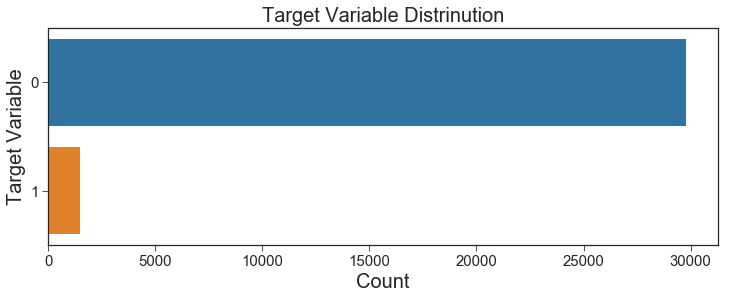

In [11]:
plotDataDistAcrossTarg(bankruptcyData, "target")

__Check count of null in each column & its percent__

In [12]:
def getNullCountPerAttribute(dataF): 
    return pd.DataFrame({'total_missing': dataF.isnull().sum(), 
                         'perc_missing': (dataF.isnull().sum()/dataF.shape[0])*100}).sort_values(
        by=['perc_missing'], ascending=False)


In [13]:
getNullCountPerAttribute(bankruptcyData)

,total_missing,perc_missing
Attr37,13768,44.011124
Attr21,4251,13.588850
Attr27,2004,6.406035
Attr60,1570,5.018700
Attr45,1566,5.005914
Attr24,680,2.173705
Attr28,601,1.921171
Attr64,601,1.921171
Attr54,601,1.921171
Attr53,601,1.921171


__Check for monotonically incraesing columns__

In [14]:
for col in bankruptcyData.columns :
    if(bankruptcyData[col].is_monotonic) :
        print("Column :", col, ": is Monotonically increasing")

Column : ID : is Monotonically increasing


__Drop attributes that are monotonically increasing or having many nulls__

In [15]:
bankruptcyData_1 = bankruptcyData.drop(['ID', 'Attr37'], axis=1)
bankruptcyData_1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,...,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,...,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,...,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


__Check for count of unique values in different attriutes__

In [16]:
def getUniqueValueCountPerAttribute(dataF): 
    return pd.DataFrame((dataF.nunique()/dataF.shape[0])*100).rename(
        {0: 'perc_unique'}, axis=1).sort_values(by=['perc_unique'], ascending=False)


In [17]:
getUniqueValueCountPerAttribute(bankruptcyData_1)

,perc_unique
Attr5,94.150177
Attr55,92.945050
Attr12,91.918934
Attr49,91.142154
Attr48,90.624301
Attr40,90.493239
Attr28,90.470863
Attr23,90.269475
Attr15,90.199150
Attr39,90.176773


__Correlation between attributes__

In [18]:
def getCorrelationBetweenAttr(dataF):
    corr = dataF.corr()
    corr_uns = corr.unstack()
    corr_uns_sort = pd.DataFrame(corr_uns.sort_values(ascending=False, kind="quicksort")).reset_index().rename({
        'level_0':'col_1', 'level_1':'col_2', 0:'corr'}, axis='columns')


    #get all correlations that are not between same variables and also not NA's
    corr_uns_sort_1 = corr_uns_sort[corr_uns_sort['col_1'] != corr_uns_sort['col_2']]
    corr_uns_sort_2 = corr_uns_sort_1.dropna()
    corr_uns_sort_3 = corr_uns_sort_2.sort_values(by=['corr'], ascending=False)
    
    return corr_uns_sort_3

In [19]:
corr_uns_sort_3 = getCorrelationBetweenAttr(bankruptcyData_1)
#Select correlations more than .50
corr_uns_sort_4 = corr_uns_sort_3.loc[(corr_uns_sort_3['corr'] >= 0.50) | (corr_uns_sort_3['corr'] <= -0.50)]

#Remove duplicates
corr_uns_sort_5 = corr_uns_sort_4.groupby(['corr']).head(1).reset_index(drop=True)

corr_uns_sort_5

,col_1,col_2,corr
0,Attr7,Attr14,1.000000
1,Attr46,Attr4,0.999950
2,Attr58,Attr20,0.999927
3,Attr43,Attr44,0.999730
4,Attr17,Attr8,0.999539
5,Attr31,Attr19,0.999459
6,Attr23,Attr19,0.999428
7,Attr53,Attr54,0.999305
8,Attr23,Attr31,0.998902
9,Attr10,Attr38,0.998791


__Correlation of different attributes to target__

In [20]:
def logitCorr_Contin_Categ(dataF):
    dataF_corr = dataF.dropna()
    X=dataF_corr.drop('target', axis=1)
    y=dataF_corr["target"]
    for col_cor in X.columns :
        X_col_cor = X[col_cor].values.reshape(-1, 1)
        clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_col_cor, y)
        print("Mean accuracy with column", col_cor, "is :", clf.score(X_col_cor, y))

In [21]:
logitCorr_Contin_Categ(bankruptcyData_1)

Mean accuracy with column Attr1 is : 0.9762901572112098
Mean accuracy with column Attr2 is : 0.9762901572112098
Mean accuracy with column Attr3 is : 0.9763328776486672
Mean accuracy with column Attr4 is : 0.9766746411483254
Mean accuracy with column Attr5 is : 0.9766746411483254
Mean accuracy with column Attr6 is : 0.9765892002734108
Mean accuracy with column Attr7 is : 0.9766746411483254
Mean accuracy with column Attr8 is : 0.9766746411483254
Mean accuracy with column Attr9 is : 0.9765892002734108
Mean accuracy with column Attr10 is : 0.9762901572112098
Mean accuracy with column Attr11 is : 0.9765464798359536
Mean accuracy with column Attr12 is : 0.9765892002734108
Mean accuracy with column Attr13 is : 0.9766746411483254
Mean accuracy with column Attr14 is : 0.9766746411483254
Mean accuracy with column Attr15 is : 0.9766746411483254
Mean accuracy with column Attr16 is : 0.9764183185235816
Mean accuracy with column Attr17 is : 0.9766746411483254
Mean accuracy with column Attr18 is : 0.

__Distribution of differnt variables__

In [22]:
def distributionOfVar(dataF):
    plt.figure(figsize=(18,9));
    plt.title("Distribution of all variables");
    plt.ylabel("Range of values on Strandard normal scale")
    plt.xlabel("Variables")
    print(dataF.shape)
    dataF.boxplot(rot=90);


(31283, 64)


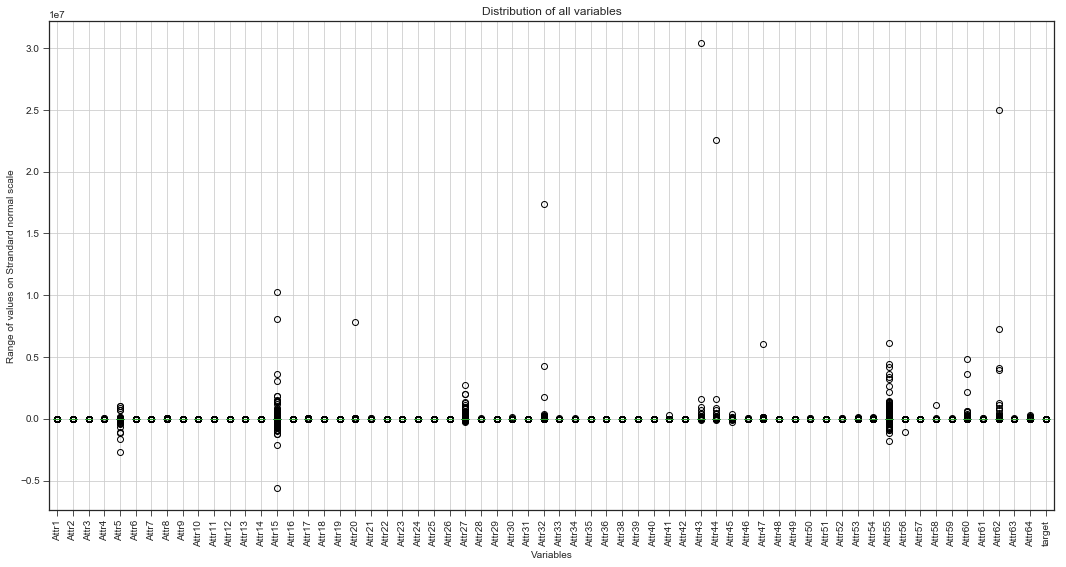

In [23]:
distributionOfVar(bankruptcyData_1)

__Outlier Detection__

__1. Using individual columns__

In [24]:
bankruptcyData_target_0 = bankruptcyData_1[bankruptcyData_1['target']==0]
bankruptcyData_target_1 = bankruptcyData_1[bankruptcyData_1['target']==1]

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr7     float64
Attr8     float64
Attr9     float64
Attr10    float64
Attr11    float64
Attr12    float64
Attr13    float64
Attr14    float64
Attr15    float64
Attr16    float64
Attr17    float64
Attr18    float64
Attr19    float64
Attr20    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr26    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
           ...   
Attr35    float64
Attr36    float64
Attr38    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr42    float64
Attr43    float64
Attr44    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr49    float64
Attr50    float64
Attr51    float64
Attr52    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    float64
Attr60    

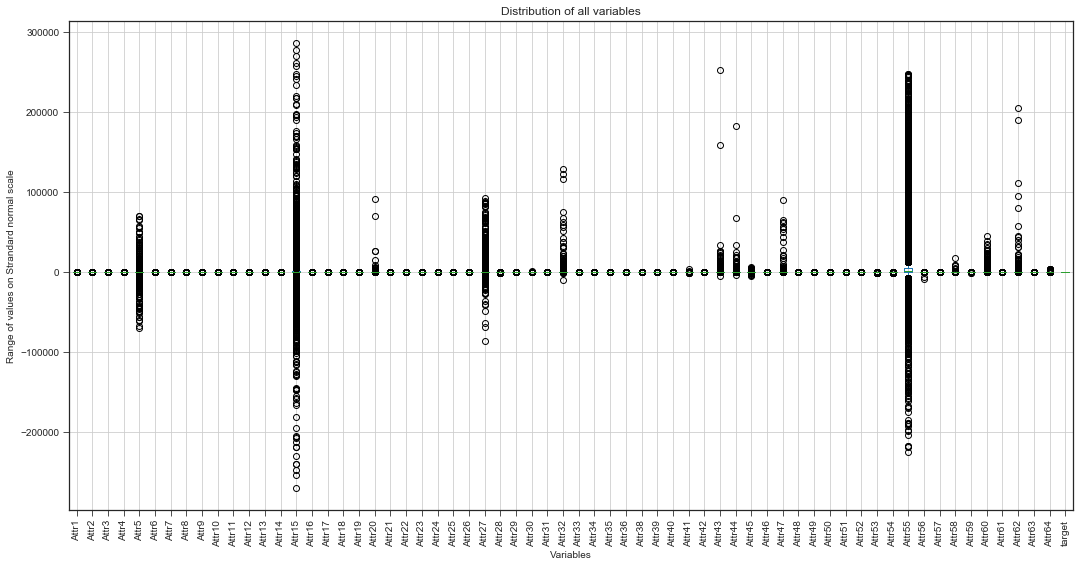

In [31]:
# np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5 ---> True: all datapoints having value beyound 5 sigma
# (np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5).any(1) --> True: Atleast one of the column in the row has a value beyong 5 sigma
# ~((np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5).any(1))] --> Select the rows with no value beyond 5 sigma

#This way we preserve the NAN
print(bankruptcyData_target_0.dtypes)
print(bankruptcyData_target_0.mean())
bankruptcyData_target_0_1 = bankruptcyData_target_0[~((np.abs(((bankruptcyData_target_0 - bankruptcyData_target_0.mean())/bankruptcyData_target_0.std())) >3).any(1))]
distributionOfVar(bankruptcyData_target_0_1)



(1361, 64)


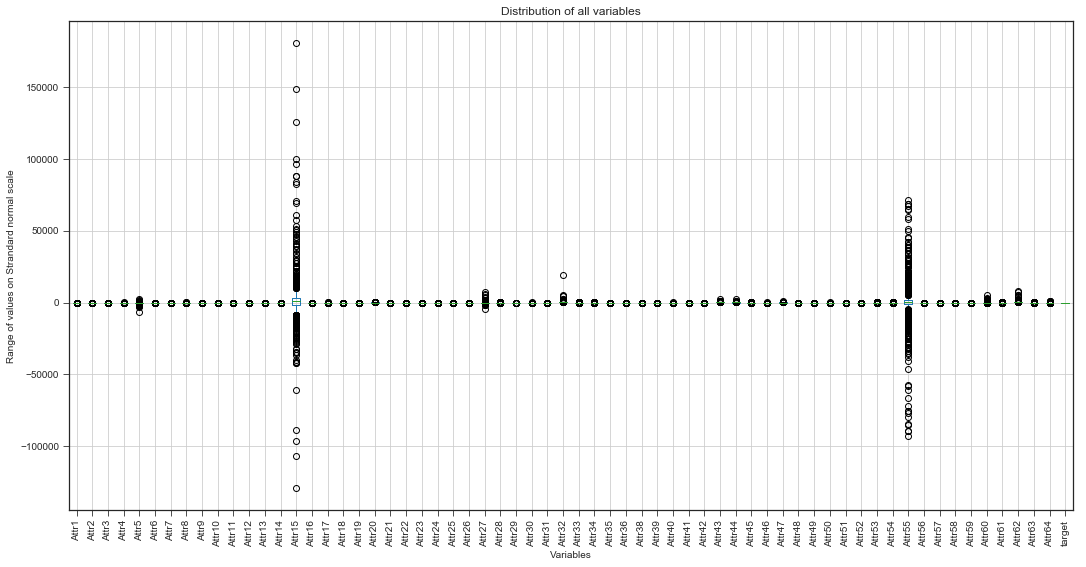

In [26]:
# np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5 ---> True: all datapoints having value beyound 5 sigma
# (np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5).any(1) --> True: Atleast one of the column in the row has a value beyong 5 sigma
# ~((np.abs(((bankruptcyData_1 - bankruptcyData_1.mean())/bankruptcyData_1.std())) >5).any(1))] --> Select the rows with no value beyond 5 sigma

#This way we preserve the NAN

bankruptcyData_target_1_1 = bankruptcyData_target_1[~((np.abs(((bankruptcyData_target_1 - bankruptcyData_target_1.mean())/bankruptcyData_target_1.std())) >3).any(1))]
distributionOfVar(bankruptcyData_target_1_1)



In [27]:
bankruptcyData_2 = bankruptcyData_target_0_1.append(bankruptcyData_target_1_1, ignore_index=True)
bankruptcyData_2.shape

(30376, 64)

__Distribution of target attribute__

0    29015
1     1361
Name: target, dtype: int64


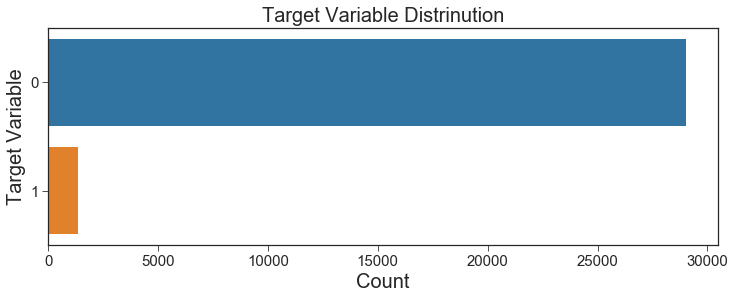

In [28]:
plotDataDistAcrossTarg(bankruptcyData_2, "target")


__2. Using Clustering__

__Decide on the number of clusters based on silhouette_score__

In [29]:
bankruptcyData_2_target_0 = bankruptcyData_2[bankruptcyData_2['target']==0]
bankruptcyData_2_target_1 = bankruptcyData_2[bankruptcyData_2['target']==1]

In [30]:
#For target==0
def getOptimalCluster(dataF):
    dataF_knn = dataF.drop('target', axis=1).fillna(dataF.mean())
    scaler = StandardScaler()
    dataF_knn_1 = scaler.fit_transform(dataF_knn)
    dataF_knn_2 = pd.DataFrame(dataF_knn_1, index=dataF_knn.index, columns=dataF_knn.columns)

    for n_clusters in range(2,10):
        clusterer = KMeans (n_clusters=n_clusters)
        preds = clusterer.fit_predict(dataF_knn_2)
        centers = clusterer.cluster_centers_
        score = silhouette_score(dataF_knn_2.values, preds, metric='euclidean')
        print ("For n_clusters =" ,n_clusters, ", silhouette score is =",score)

    return dataF_knn_2
        

In [31]:
dataF_knn_2 = getOptimalCluster(bankruptcyData_2_target_0)
dataF_knn_2.head()

For n_clusters = 2 , silhouette score is = 0.9752334026762917
For n_clusters = 3 , silhouette score is = 0.24181343198017474
For n_clusters = 4 , silhouette score is = 0.1738876529597503
For n_clusters = 5 , silhouette score is = 0.28573332258420414
For n_clusters = 6 , silhouette score is = 0.2822477730959685
For n_clusters = 7 , silhouette score is = 0.2837672952359339
For n_clusters = 8 , silhouette score is = 0.12135130811255047
For n_clusters = 9 , silhouette score is = 0.2725717519234712


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.356101,-0.139250,0.293921,-0.110918,0.003622,0.354939,0.420530,-0.142837,0.388174,0.173674,...,-0.201414,0.008413,0.065451,-0.014500,-0.023337,-0.075952,-0.095218,-0.048568,-0.035926,-0.129803
1,-0.323575,-0.271538,-0.010493,-0.121899,0.003337,-0.039193,-0.368395,-0.122224,-0.531690,0.301226,...,-0.253605,0.011585,-0.099951,-0.015415,-0.002026,-0.079495,-0.289339,-0.033885,-0.259388,-0.164696
2,0.226105,-0.861108,0.740950,0.451297,0.113861,-0.039193,0.276559,0.135307,-0.743772,0.869690,...,0.014010,0.009761,-0.011641,-0.015316,-0.036756,-0.075507,-0.329146,-0.053072,0.102550,-0.165770
3,-0.018924,2.233461,-1.329327,-0.265389,-0.020941,-1.717922,-0.015066,-0.250422,-0.527295,-2.253405,...,-0.851548,0.006852,-0.191912,-0.013884,-0.329878,-0.051024,0.130907,-0.036326,-0.235029,-0.139072
4,0.336735,0.378428,0.640147,-0.043452,-0.011080,-0.509458,0.244834,-0.191523,0.301923,-0.325472,...,-0.250365,0.008935,0.159682,-0.014411,0.141848,-0.081564,0.173475,-0.050539,0.017465,-0.118545


__So 2 Clusters does the best segregation of data with target=0__

In [32]:
kMeansModel = KMeans(n_clusters=2, max_iter=300)
kMeansModel.fit(dataF_knn_2)

cluster_map = pd.DataFrame()
cluster_map = dataF_knn_2
cluster_map['cluster'] = kMeansModel.labels_
cluster_map.head()
cluster_map['cluster'].value_counts()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,cluster
0,0.356101,-0.139250,0.293921,-0.110918,0.003622,0.354939,0.420530,-0.142837,0.388174,0.173674,...,0.008413,0.065451,-0.014500,-0.023337,-0.075952,-0.095218,-0.048568,-0.035926,-0.129803,0
1,-0.323575,-0.271538,-0.010493,-0.121899,0.003337,-0.039193,-0.368395,-0.122224,-0.531690,0.301226,...,0.011585,-0.099951,-0.015415,-0.002026,-0.079495,-0.289339,-0.033885,-0.259388,-0.164696,0
2,0.226105,-0.861108,0.740950,0.451297,0.113861,-0.039193,0.276559,0.135307,-0.743772,0.869690,...,0.009761,-0.011641,-0.015316,-0.036756,-0.075507,-0.329146,-0.053072,0.102550,-0.165770,0
3,-0.018924,2.233461,-1.329327,-0.265389,-0.020941,-1.717922,-0.015066,-0.250422,-0.527295,-2.253405,...,0.006852,-0.191912,-0.013884,-0.329878,-0.051024,0.130907,-0.036326,-0.235029,-0.139072,0
4,0.336735,0.378428,0.640147,-0.043452,-0.011080,-0.509458,0.244834,-0.191523,0.301923,-0.325472,...,0.008935,0.159682,-0.014411,0.141848,-0.081564,0.173475,-0.050539,0.017465,-0.118545,0


0    29013
1        2
Name: cluster, dtype: int64

In [33]:
# So based on abve analysis we can remove rows belonging to cluster 1, 2
bankruptcyData_2_tar_0 = bankruptcyData_2.ix[dataF_knn_2.loc[dataF_knn_2['cluster'] == 0].index]
bankruptcyData_2_tar_0.head()
bankruptcyData_2_tar_0.shape


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,...,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,...,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,...,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


(29013, 64)

In [34]:
#For target==1
getOptimalCluster(bankruptcyData_2_target_1)


For n_clusters = 2 , silhouette score is = 0.34903178924534617
For n_clusters = 3 , silhouette score is = 0.385220108130272
For n_clusters = 4 , silhouette score is = 0.3165776590430684
For n_clusters = 5 , silhouette score is = 0.220143319566503
For n_clusters = 6 , silhouette score is = 0.19914216589223652
For n_clusters = 7 , silhouette score is = 0.17701213652080613
For n_clusters = 8 , silhouette score is = 0.1531150891317455
For n_clusters = 9 , silhouette score is = 0.15986518907489172


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
29015,-0.795406,0.283145,-0.663490,-0.341779,0.113168,-0.239173,-0.790576,-0.282005,-0.522996,-0.279438,...,-0.421203,-0.090398,-0.666842,0.154780,-0.197277,-3.174836e-02,-0.159747,-0.240866,-0.130661,-1.707112e-01
29016,1.321454,-0.496539,1.205006,0.072398,0.419805,0.259278,1.485462,-0.101855,1.077446,0.535784,...,0.213772,0.297346,0.273411,-0.356464,-0.197277,1.184858e-01,-0.434163,-0.309985,0.230912,5.927442e+00
29017,-1.791496,0.508064,-0.315933,-0.300427,-0.352577,-0.756163,-2.053996,-0.302716,-0.547082,-0.443248,...,-0.256717,-0.230110,-2.463840,0.322360,1.380274,-1.708556e-01,0.832927,0.026400,-0.477851,-2.617976e-01
29018,0.413629,-0.618718,-0.035048,-0.244203,0.161113,0.259278,0.358541,-0.050815,0.253806,0.655373,...,-0.009525,-0.120616,0.065922,-0.158298,-0.004431,-1.093745e-01,0.586760,-0.325872,0.388194,-2.593735e-01
29019,0.165273,-0.620478,0.878449,0.128131,0.169636,0.259278,0.113398,-0.049991,-0.545019,0.657089,...,0.224206,-0.010946,0.015609,0.169639,-0.197277,-1.713675e-01,-0.487698,-0.165137,-0.302640,-2.579877e-01
29020,0.271735,-1.568855,2.182943,6.862552,1.197931,0.314694,0.260714,4.670608,-0.502490,1.377197,...,1.995490,0.020491,0.029483,0.021789,-0.197277,-1.186602e-01,-0.284858,-0.393011,3.017407,1.651322e+00
29021,0.477296,-0.976665,1.254255,0.374734,0.773642,0.259278,0.473191,0.203754,-0.313268,1.003978,...,0.255349,0.133783,0.065502,-0.233957,-0.197277,2.439846e-01,-0.325730,-0.262655,-0.050738,-2.014057e-01
29022,0.401516,-0.511386,0.336478,-0.072921,0.190746,0.382053,0.452083,-0.111949,-0.433634,0.467302,...,3.656330,0.346921,0.071516,-0.369466,0.071036,-1.477148e-01,-0.215958,-0.293544,0.109386,-2.595489e-01
29023,0.322086,-0.461705,-0.029493,-0.246217,-2.110245,0.238063,0.294598,-0.114399,-0.654110,0.502285,...,0.053724,3.462701,0.051597,-3.796429,-0.077981,-1.184758e-01,-0.596813,0.001787,-0.464222,-2.846810e-01
29024,0.830622,-0.009132,0.631994,-0.137345,0.052165,0.259278,0.875610,-0.229866,0.368259,0.061025,...,0.187710,1.622003,0.262764,-1.857381,-0.197277,-1.602462e-01,-0.356558,-0.172946,-0.289754,2.257501e+00


__The datapoints for target=1, cluster are scattered__

__Merge the target 0 & 1__

In [35]:
bankruptcyData_3 = bankruptcyData_2_tar_0.append(bankruptcyData_2_target_1, ignore_index=True)
bankruptcyData_3.shape
bankruptcyData_3.head()

(30374, 64)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
1,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
2,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,...,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
3,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,...,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
4,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,...,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


(30374, 64)


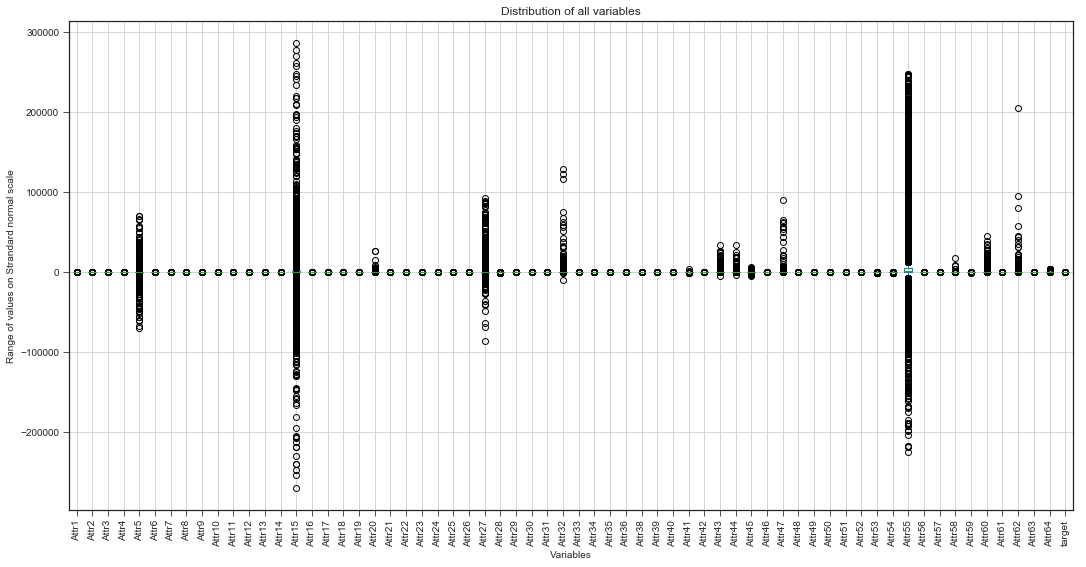

In [36]:
distributionOfVar(bankruptcyData_3)


__Distribution of target attribute__

0    29013
1     1361
Name: target, dtype: int64


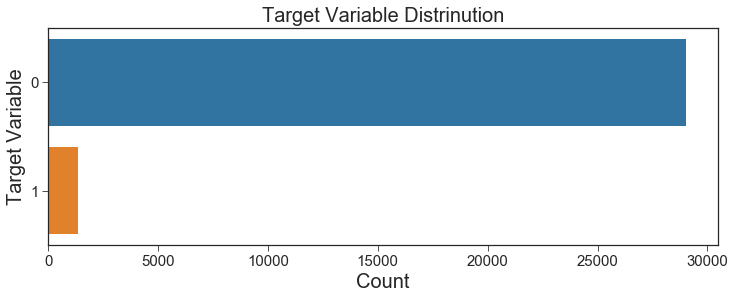

In [37]:
plotDataDistAcrossTarg(bankruptcyData_3, "target")


__Get VIF of each attribute__

In [38]:
def getVIF(dataF):
    vif = pd.DataFrame()
    dataF_vif = dataF.dropna()
    vif["VIF_Factor"] = [variance_inflation_factor(dataF_vif.values, i) for i in range(dataF_vif.shape[1])]
    vif["features"] = dataF_vif.columns
    return vif.sort_values('VIF_Factor', ascending=False)

In [39]:
getVIF(bankruptcyData_3)

,VIF_Factor,features
6,inf,Attr7
17,inf,Attr18
13,inf,Attr14
41,5.243130e+09,Attr43
19,2.489348e+09,Attr20
42,2.061349e+09,Attr44
47,8.247644e+03,Attr49
18,6.394733e+03,Attr19
40,4.936273e+03,Attr42
12,4.906898e+03,Attr13


__There are lot of attributes with very high VIF, but for non distance based algo(DT, RF) that doesn't matter__

In [40]:
bankruptcyData_3 = bankruptcyData_3.drop(['Attr7', 'Attr18', 'Attr14', 'Attr43', 'Attr20', 'Attr44', 'Attr49', 
                                          'Attr19', 'Attr42', 'Attr13','Attr16', 'Attr17', 'Attr63', 'Attr8',
                                          'Attr26', 'Attr33', 'Attr38', 'Attr10' , 'Attr2', 'Attr52', 'Attr32'], axis=1)

__Get Number of missing values in each row__

In [41]:
def getMissingValueByRow(dataF):
    return pd.DataFrame(dataF.isna().sum(axis=1)).rename({0:"count_of_null"}, axis=1).sort_values(
        by='count_of_null', ascending=False).assign(
        count_of_null_percent=lambda row:(row.count_of_null/dataF.shape[1])*100)


In [42]:
bankruptcyData_3_missing_row = getMissingValueByRow(bankruptcyData_3)
bankruptcyData_3_missing_row.head()

,count_of_null,count_of_null_percent
18127,27,62.790698
28368,21,48.837209
12074,20,46.511628
25379,19,44.186047
462,19,44.186047


__Drop rows with more than 40% missing values__

In [43]:
#We can see there are many rows with more than 40% missing rows, eliminate them.
bankruptcyData_4 = bankruptcyData_3.ix[bankruptcyData_3_missing_row.loc[bankruptcyData_3_missing_row[
    'count_of_null_percent'] <= 40].index]
bankruptcyData_4.head()

,Attr1,Attr3,Attr4,Attr5,Attr6,Attr9,Attr11,Attr12,Attr15,Attr21,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,target
19291,-0.012535,0.974100,38.609,34983.000,-0.025901,0.0,-0.012535,-0.48397,-754.180,NaN,...,48.102,NaN,-0.012868,NaN,0.0000,NaN,NaN,NaN,NaN,0
13283,0.143180,0.022586,NaN,233.480,0.059758,0.0,0.143180,NaN,0.000,NaN,...,37.460,NaN,0.143180,NaN,0.0000,NaN,0.0,NaN,0.0,0
10652,-0.314330,0.980000,49.998,77.169,-0.055115,0.0,-0.314330,-15.71600,-23.225,NaN,...,239.790,NaN,-0.320750,NaN,0.0000,NaN,0.0,NaN,NaN,0
3188,-0.026122,0.532390,NaN,7600.500,0.000000,0.0,-0.026122,NaN,-11948.000,NaN,...,311.300,NaN,-0.180280,NaN,5.9014,NaN,0.0,NaN,0.0,0
7733,-0.039076,0.993540,154.830,-9153.300,0.000000,0.0,-0.039076,-6.05030,-8828.900,NaN,...,529.190,NaN,-0.713090,NaN,17.1310,NaN,0.0,NaN,NaN,0


__Check count of null in each column & its percent__

In [44]:
getNullCountPerAttribute(bankruptcyData_4)

,total_missing,perc_missing
Attr21,4018,13.231904
Attr27,1859,6.121979
Attr45,1366,4.498452
Attr60,1366,4.498452
Attr24,654,2.153725
Attr41,511,1.682803
Attr28,488,1.607061
Attr53,488,1.607061
Attr54,488,1.607061
Attr64,488,1.607061


__Datatype Conversion__

In [45]:
bankruptcyData_4.dtypes

Attr1     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr9     float64
Attr11    float64
Attr12    float64
Attr15    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
Attr31    float64
Attr34    float64
Attr35    float64
Attr36    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr50    float64
Attr51    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    float64
Attr60    float64
Attr61    float64
Attr62    float64
Attr64    float64
target      int64
dtype: object

__Convert datatype of target only__

In [46]:
cat_col = ['target']
num_col = np.setdiff1d(bankruptcyData_4.columns, cat_col)

cat_col
num_col


['target']

array(['Attr1', 'Attr11', 'Attr12', 'Attr15', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29',
       'Attr3', 'Attr30', 'Attr31', 'Attr34', 'Attr35', 'Attr36',
       'Attr39', 'Attr4', 'Attr40', 'Attr41', 'Attr45', 'Attr46',
       'Attr47', 'Attr48', 'Attr5', 'Attr50', 'Attr51', 'Attr53',
       'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59',
       'Attr6', 'Attr60', 'Attr61', 'Attr62', 'Attr64', 'Attr9'],
      dtype=object)

In [47]:
#Do the datatype conversion
for col in cat_col:
    bankruptcyData_4[col] = bankruptcyData_4[col].astype('category', copy=True)

In [48]:
bankruptcyData_4.dtypes

Attr1      float64
Attr3      float64
Attr4      float64
Attr5      float64
Attr6      float64
Attr9      float64
Attr11     float64
Attr12     float64
Attr15     float64
Attr21     float64
Attr22     float64
Attr23     float64
Attr24     float64
Attr25     float64
Attr27     float64
Attr28     float64
Attr29     float64
Attr30     float64
Attr31     float64
Attr34     float64
Attr35     float64
Attr36     float64
Attr39     float64
Attr40     float64
Attr41     float64
Attr45     float64
Attr46     float64
Attr47     float64
Attr48     float64
Attr50     float64
Attr51     float64
Attr53     float64
Attr54     float64
Attr55     float64
Attr56     float64
Attr57     float64
Attr58     float64
Attr59     float64
Attr60     float64
Attr61     float64
Attr62     float64
Attr64     float64
target    category
dtype: object

__Observation :-__
1. Class imbalance of target by 95:5 
2. Attr37 has 44% missing values, can be dropped.
3. No missing values in target
4. Only ID column is Monotonically increasing
5. All the attributes except target & ID are in float.
6. All of the columns except target is continuous variable.
7. Almost all attribute have very high variance.
8. Max value of columns are way above the 75% limit, hence signs of outliers. mean value also supports same argument.
9. Many features are highly correlated, do PCA.

__Assumptions/Actions/Inference :-__
1. Drop column Attr37.
2. Drop ID column.
3. Outlier detection.
4. High variance of column.
5. Class imbalance.
6. PCA to reduce multicollinearity.
7. Remove rows with more than certain number/% of NA columns.
8. Identify values in column, that are way apart from other values in same column

## EDA

__Pair wise distribution__

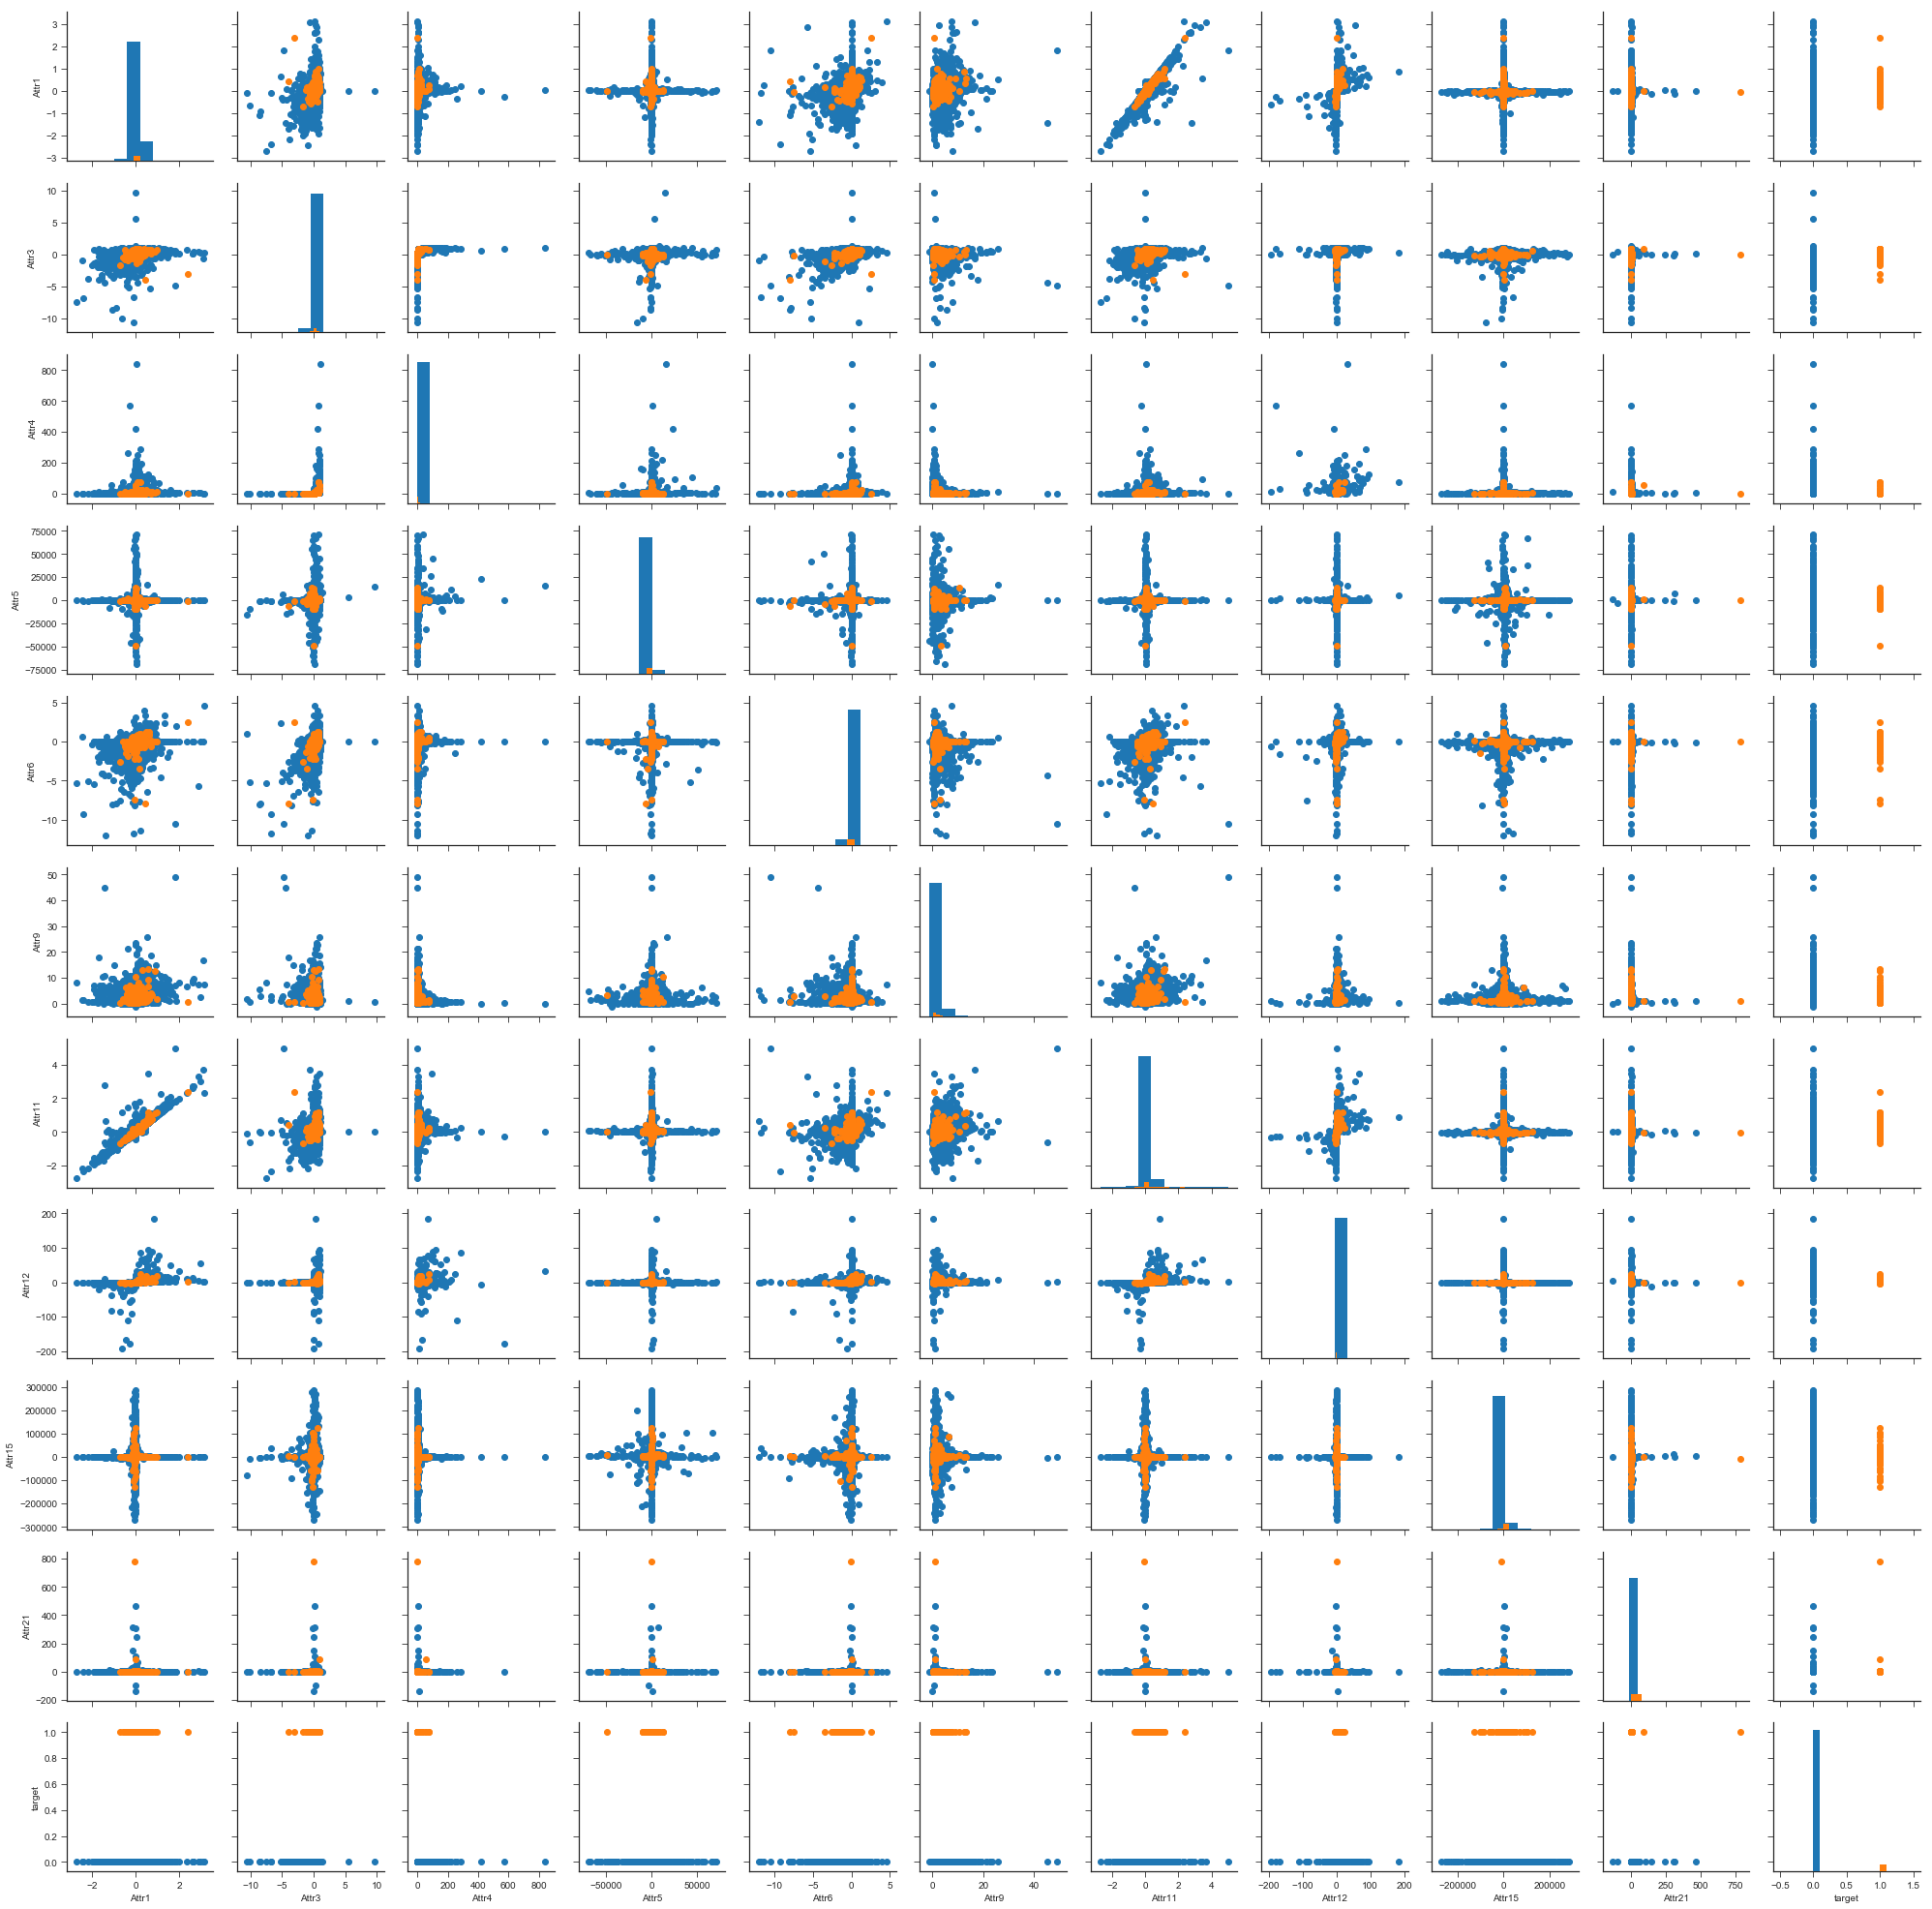

In [49]:
bankruptcyData_4_1 = pd.concat([bankruptcyData_4.iloc[:,0:10].reset_index(drop=True), 
                                bankruptcyData_4[['target']]], axis=1)
g = sns.PairGrid(bankruptcyData_4_1, hue="target")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

__PCA__

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

,Number of PC,Cumulative Sum of variance
0,1,0.728555
1,2,0.971794
2,3,0.986300
3,4,0.993635
4,5,0.997200


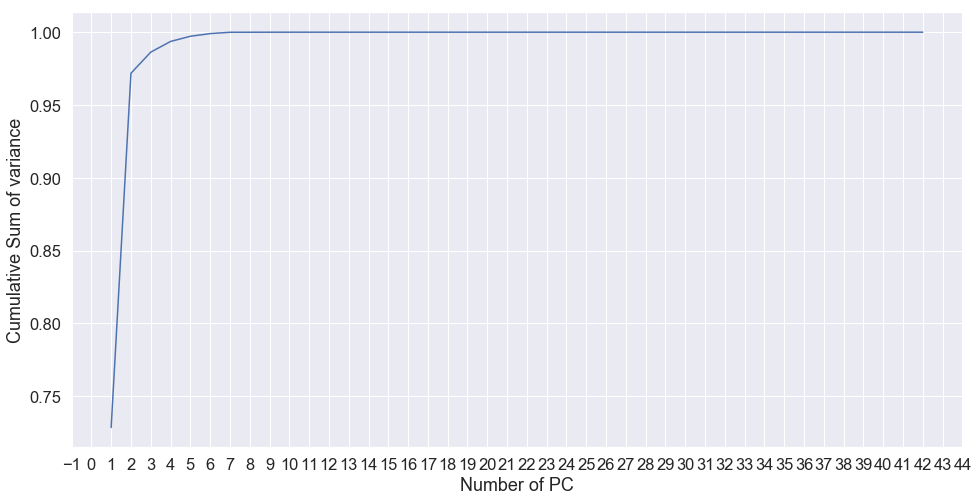

In [50]:
bankruptcyData_4_pca = bankruptcyData_4.fillna(bankruptcyData_4.mean())
X=bankruptcyData_4_pca.drop('target', axis=1)
y=bankruptcyData_4_pca["target"]

pca = PCA()
pca.fit(X)

bankruptcyData_4_pca_df = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)).reset_index()
bankruptcyData_4_pca_df['index'] = bankruptcyData_4_pca_df['index']+1
bankruptcyData_4_pca_df = bankruptcyData_4_pca_df.rename(
    {"index": "Number of PC", 0: "Cumulative Sum of variance"}, axis=1)

bankruptcyData_4_pca_df.head()


fig = plt.gcf()
fig.set_size_inches( 16, 8)
sns.set(font_scale = 1.5)
bankruptcyData_4_pca_df_line_plot = sns.lineplot(x="Number of PC", y="Cumulative Sum of variance", 
                                                 data=bankruptcyData_4_pca_df)

bankruptcyData_4_pca_df_line_plot.xaxis.set_major_locator(ticker.MultipleLocator(1))
bankruptcyData_4_pca_df_line_plot.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

## Data PreProcessing

__Correlated features__

In [51]:
bankruptcyData_4.head()

,Attr1,Attr3,Attr4,Attr5,Attr6,Attr9,Attr11,Attr12,Attr15,Attr21,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,target
19291,-0.012535,0.974100,38.609,34983.000,-0.025901,0.0,-0.012535,-0.48397,-754.180,NaN,...,48.102,NaN,-0.012868,NaN,0.0000,NaN,NaN,NaN,NaN,0
13283,0.143180,0.022586,NaN,233.480,0.059758,0.0,0.143180,NaN,0.000,NaN,...,37.460,NaN,0.143180,NaN,0.0000,NaN,0.0,NaN,0.0,0
10652,-0.314330,0.980000,49.998,77.169,-0.055115,0.0,-0.314330,-15.71600,-23.225,NaN,...,239.790,NaN,-0.320750,NaN,0.0000,NaN,0.0,NaN,NaN,0
3188,-0.026122,0.532390,NaN,7600.500,0.000000,0.0,-0.026122,NaN,-11948.000,NaN,...,311.300,NaN,-0.180280,NaN,5.9014,NaN,0.0,NaN,0.0,0
7733,-0.039076,0.993540,154.830,-9153.300,0.000000,0.0,-0.039076,-6.05030,-8828.900,NaN,...,529.190,NaN,-0.713090,NaN,17.1310,NaN,0.0,NaN,NaN,0


In [52]:
corr_uns_sort_3 = getCorrelationBetweenAttr(bankruptcyData_4)

#Select correlations more than .60
corr_uns_sort_4 = corr_uns_sort_3.loc[(corr_uns_sort_3['corr'] >= 0.60) | (corr_uns_sort_3['corr'] <= -0.60)]
#Remove duplicates
corr_uns_sort_5 = corr_uns_sort_4.groupby(['corr']).head(1).reset_index(drop=True)
corr_uns_sort_5

,col_1,col_2,corr
0,Attr54,Attr28,0.977466
1,Attr4,Attr46,0.971556
2,Attr53,Attr54,0.969834
3,Attr23,Attr31,0.967682
4,Attr4,Attr50,0.958154
5,Attr46,Attr50,0.947086
6,Attr1,Attr11,0.946009
7,Attr53,Attr28,0.944297
8,Attr22,Attr11,0.915602
9,Attr22,Attr35,0.905098


### Train-Test Split

In [53]:
X=bankruptcyData_4.drop('target', axis=1)
y=bankruptcyData_4["target"]

__Split__

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24292, 42)
(6074, 42)
(24292,)
(6074,)


In [56]:
X_train.head()

,Attr1,Attr3,Attr4,Attr5,Attr6,Attr9,Attr11,Attr12,Attr15,Attr21,...,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64
2938,0.131610,0.54368,6.63030,150.930,0.42411,1.13350,0.166550,1.724800,154.85,1.01560,...,2.44330,72887.00,0.117810,0.14973,0.88219,0.000000,8.1301,4.4805,30.607,3.20090
19610,0.089645,0.30291,1.82140,-24.900,0.16976,1.06350,0.111700,0.302920,731.79,0.97164,...,1.89520,7162.60,0.059684,0.15199,0.94032,0.055003,5.1484,12.1150,58.836,6.96760
27110,-0.083192,-0.31482,0.74090,-23.565,-0.31192,7.71000,0.057585,-0.034225,9945.80,NaN,...,-2.15540,-123.08,0.016393,0.38685,1.00540,0.000000,45.7950,11.4310,57.522,77.27400
3502,0.076627,0.24207,1.60790,32.973,0.22723,1.06110,0.097799,0.245610,1308.70,1.03890,...,1.64520,4899.60,0.057589,0.15603,0.94241,0.205150,11.5600,3.0049,102.630,3.93660
5749,-0.086935,-0.15365,0.44182,-147.020,-0.15460,0.66074,-0.085231,-0.315830,-4414.00,0.79775,...,0.79577,-1275.30,0.189440,-0.22917,0.81636,0.842630,14.0430,9.6763,152.060,0.75222


In [57]:
X_train.shape

(24292, 42)

__So we can see there are a set of variables that are highly correlated, we need to identify the important features & implement our algo based on them__


__1. Using Random Forest__


In [58]:
rf_feature_selection_model = RandomForestClassifier(n_estimators=1000, max_depth=3,random_state=0, 
                                                    max_features=9)
X_train_selection_model = X_train.fillna(X_train.mean())
rf_feature_selection_model.fit(X_train_selection_model, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
X_test_selection_model = X_test.fillna(X_train.mean())
y_test_pred = rf_feature_selection_model.predict(X_test_selection_model)
f1_score(y_test, y_test_pred)

0.0

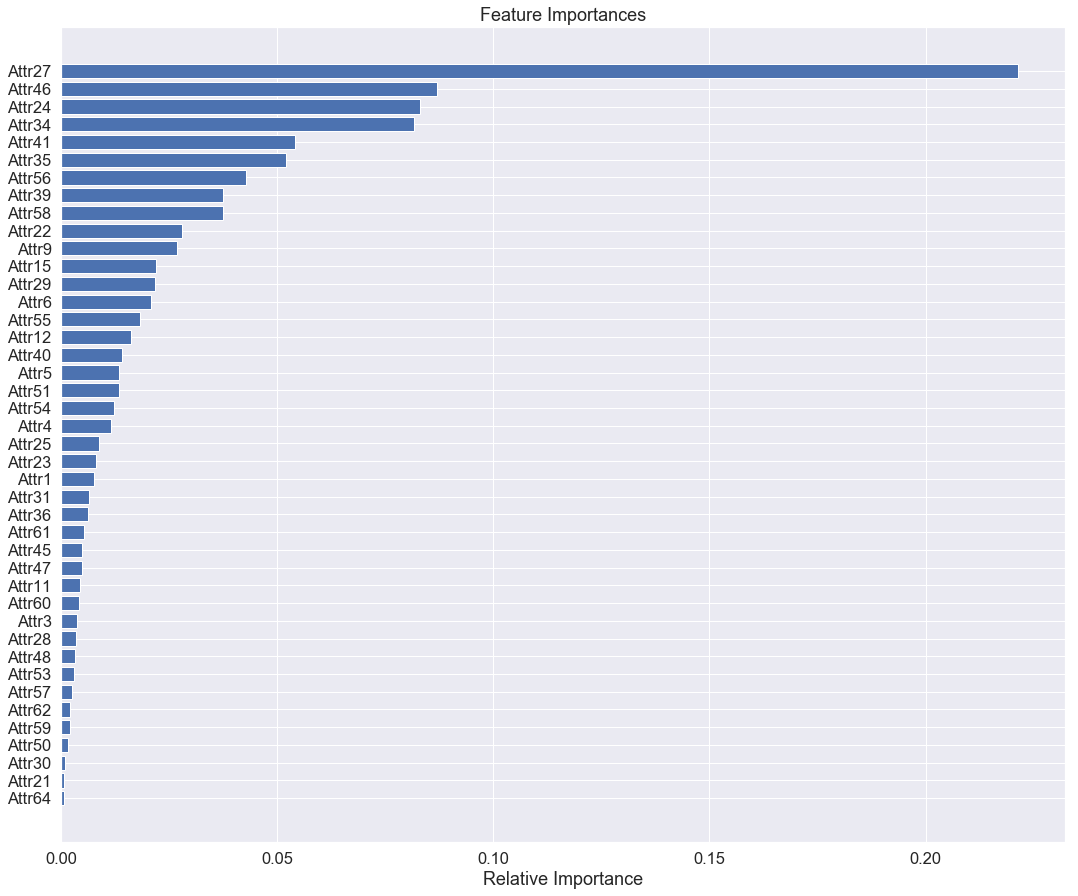

In [60]:
features = X_train_selection_model.columns
importances = rf_feature_selection_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (18,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();


__2. Feature Selection by importance with RFE__

from sklearn.feature_selection import RFE
xgbc_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.4, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
rfe = RFE(xgbc_model, n_features_to_select=50, verbose=3)
rfe = rfe.fit(X_train.fillna(X_train.mean()), y_train)
print(rfe.support_)
print(rfe.ranking_)

In [61]:
cat_col = ['target']
num_col = np.setdiff1d(X_train.columns, cat_col)

cat_col
num_col

['target']

array(['Attr1', 'Attr11', 'Attr12', 'Attr15', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr27', 'Attr28', 'Attr29',
       'Attr3', 'Attr30', 'Attr31', 'Attr34', 'Attr35', 'Attr36',
       'Attr39', 'Attr4', 'Attr40', 'Attr41', 'Attr45', 'Attr46',
       'Attr47', 'Attr48', 'Attr5', 'Attr50', 'Attr51', 'Attr53',
       'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59',
       'Attr6', 'Attr60', 'Attr61', 'Attr62', 'Attr64', 'Attr9'],
      dtype=object)

In [62]:
X_train_num = X_train[num_col]

In [63]:
X_train_num.head()

,Attr1,Attr11,Attr12,Attr15,Attr21,Attr22,Attr23,Attr24,Attr25,Attr27,...,Attr56,Attr57,Attr58,Attr59,Attr6,Attr60,Attr61,Attr62,Attr64,Attr9
2938,0.131610,0.166550,1.724800,154.85,1.01560,0.134780,0.114290,0.531090,0.87900,1.32670,...,0.117810,0.14973,0.88219,0.000000,0.42411,8.1301,4.4805,30.607,3.20090,1.13350
19610,0.089645,0.111700,0.302920,731.79,0.97164,0.136070,0.039186,0.213770,0.58980,0.63255,...,0.059684,0.15199,0.94032,0.055003,0.16976,5.1484,12.1150,58.836,6.96760,1.06350
27110,-0.083192,0.057585,-0.034225,9945.80,NaN,0.057585,-0.010790,-0.041586,-0.34294,0.58067,...,0.016393,0.38685,1.00540,0.000000,-0.31192,45.7950,11.4310,57.522,77.27400,7.71000
3502,0.076627,0.097799,0.245610,1308.70,1.03890,0.120440,0.054110,0.292690,0.49109,0.90247,...,0.057589,0.15603,0.94241,0.205150,0.22723,11.5600,3.0049,102.630,3.93660,1.06110
5749,-0.086935,-0.085231,-0.315830,-4414.00,0.79775,0.000000,-0.131570,-0.224450,0.26947,0.00000,...,0.189440,-0.22917,0.81636,0.842630,-0.15460,14.0430,9.6763,152.060,0.75222,0.66074


### Building Pipeline

__Handle class imbalance : Smote__

In [64]:
np.bincount(y_train)

array([23201,  1091])

In [65]:
smt = SMOTE(sampling_strategy={0:np.bincount(y_train)[0],1:7650}, random_state=42)
smt

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=42, ratio=None,
   sampling_strategy={0: 23201, 1: 7650}, svm_estimator='deprecated')

__Interaction Variables__

In [66]:
poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)

__Impute and scale attributes__

In [67]:
numeric_transformer = Pipeline(memory ='./' ,steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly',poly),
    ('scaler', StandardScaler())])

In [68]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col)])

## Model Building

__Append model to pipeline__

In [69]:
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1245)

xgbModel = XGBClassifier() 
clf = impipe(steps=[('preprocessor', preprocessor),
                    ('sampling', smt),
                    ('classifier', xgbModel)])

In [70]:
# Use a grid over parameters of interest
search_space = [{'classifier': [XGBClassifier()],
                 'classifier__n_estimators': [600],
                 'classifier__gamma': [0.2],
                'classifier__learning_rate': [0.2],
                'classifier__max_depth': [5],
                'classifier__scale_pos_weight': [3]}]

__Stacking__


1. Not possible with pipelines. http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/ 
2. Without pipeline, we have to do all preprocessing & then pass to the grid.

In [71]:
CV_xgbModel = GridSearchCV(estimator=clf, param_grid=search_space, cv= rkf, scoring='f1', n_jobs=-1, 
                           verbose=3, refit=True)
CV_xgbModel.fit(X=X_train, y=y_train)


Fitting 6 folds for each of 1 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed: 44.7min remaining: 44.7min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 45.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 45.1min finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a3b05af98>,
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory='./',
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classifier': [XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='binary:logisti...assifier__learning_rate': [0.2], 'classifier__max_depth': [5], 'cl

In [72]:
def getGridSummary(GVModel):
    print('Best score = ', GVModel.best_score_)
    print('\n')
    
    print('Best parameter : ')
    print(GVModel.best_params_)    
    print('\n')
    
    print('Best Model : ')
    print(GVModel.best_estimator_.get_params()['classifier'])
    print('\n')
    
    print('Grid search execution stat :')
    return pd.DataFrame(GVModel.cv_results_)
    

In [73]:
getGridSummary(CV_xgbModel)

Best score =  0.7725261852313213


Best parameter : 
{'classifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silent=True, subsample=1), 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 600, 'classifier__scale_pos_weight': 3}


Best Model : 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.2, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=None,
       silen

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__gamma,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__scale_pos_weight,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,2680.187638,10.44668,0.525074,0.07425,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.2,0.2,5,600,3,...,0.013804,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


__Training data evaluation__

In [74]:
def evaluateModel(GSModel, X, y):
    y_pred = GSModel.predict(X)
    print("F1 Score :", f1_score(y,y_pred))
    print("Accuracy score :", accuracy_score(y,y_pred))
    print("classification_report :\n",classification_report(y,y_pred,digits=4))

In [75]:
evaluateModel(CV_xgbModel, X_train, y_train)

F1 Score : 1.0
Accuracy score : 1.0
classification_report :
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     23201
           1     1.0000    1.0000    1.0000      1091

   micro avg     1.0000    1.0000    1.0000     24292
   macro avg     1.0000    1.0000    1.0000     24292
weighted avg     1.0000    1.0000    1.0000     24292



## Evaluate the model

__F1 Score__

1. In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy.
2. F1 Score = 2*(Recall * Precision) / (Recall + Precision)
3. F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
4. The F1 score is the harmonic average of the precision and recall,where an F1 score reaches it's best valueat 1 (perfect precision and recall) and worst at 0
5. Both High Precession & High Recall is needed.

In [76]:
X_test.head()

,Attr1,Attr3,Attr4,Attr5,Attr6,Attr9,Attr11,Attr12,Attr15,Attr21,...,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64
18625,0.173760,0.239840,2.9864,50.50500,0.44501,1.3052,0.173760,1.439100,669.66,1.11920,...,1.09190,13425.00,0.233850,0.410290,0.76615,0.6486,11.7660,7.7629,53.118,1.2975
17513,0.097248,0.356020,2.2583,21.70100,0.20217,1.0744,0.124200,0.438980,1249.70,1.51910,...,1.87890,75120.00,0.069284,0.233540,0.93072,0.6291,9.2378,5.3524,49.196,5.8141
24685,0.020226,0.012656,1.0466,-1791.70000,0.00000,1.6684,0.052744,0.077893,5357.90,1.19700,...,0.85287,1140.50,0.007885,0.070062,1.02540,1.1139,16.5580,9.1830,59.465,2.3316
22790,-0.090142,0.653870,2.9929,-0.37761,0.00000,3.6816,-0.081398,-0.274750,-2530.70,0.66197,...,31.58100,653.73,0.002203,-0.158240,1.02450,0.0000,5.6666,13.6540,32.527,204.1100
2522,0.456570,0.260050,1.5979,14.16400,0.00000,2.7373,0.470140,1.049700,309.65,NaN,...,1.85260,411.24,0.172800,0.808000,0.83413,0.0000,16.0490,6.1809,57.996,8.9741


__Evaluate Test data__

In [77]:
evaluateModel(CV_xgbModel, X_test, y_test)


F1 Score : 0.7966101694915254
Accuracy score : 0.9841949292064537
classification_report :
               precision    recall  f1-score   support

           0     0.9860    0.9976    0.9918      5804
           1     0.9307    0.6963    0.7966       270

   micro avg     0.9842    0.9842    0.9842      6074
   macro avg     0.9584    0.8469    0.8942      6074
weighted avg     0.9836    0.9842    0.9831      6074



__Confustion matrix__

In [78]:
def plotConfusionMatrix(y, y_pred):
    ax= plt.subplot()
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu");
    print(cm)
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0', '1']);
    ax.yaxis.set_ticklabels(['0', '1']);


[[5790   14]
 [  82  188]]


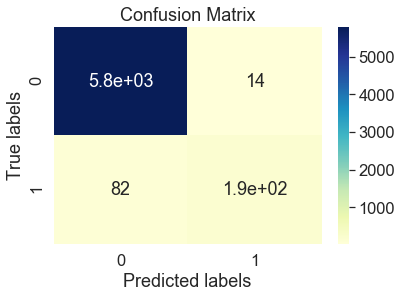

In [79]:
y_pred = CV_xgbModel.predict(X_test)
plotConfusionMatrix(y_test,y_pred)


__Precision & Recall curve__

In [80]:
def plotPrecisionRecall(y, y_pred_prob):
    plt.figure(figsize = (8,8))
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
    # calculate average precision score
    ap = average_precision_score(y, y_pred_prob)
    print('ap=%.3f' % (ap))
    # plot the roc curve for the model
    plt.plot(recall, precision);
    # show the plot
    plt.show()

f1=0.797 ap=0.860


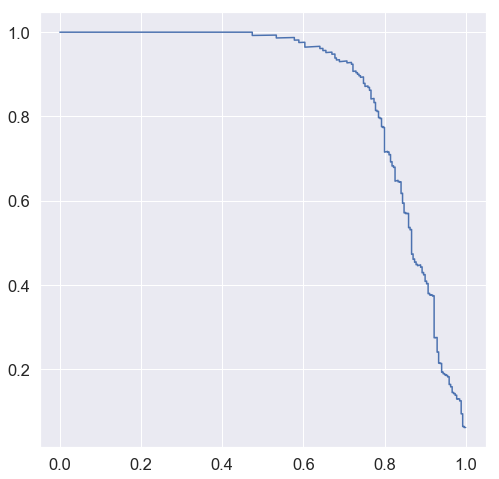

In [81]:
y_pred = CV_xgbModel.predict(X_test)
y_test_pred_prob=CV_xgbModel.predict_proba(X_test)
y_test_pred_prob_1 = y_test_pred_prob[:, 1]
plotPrecisionRecall(y_test, y_pred, y_test_pred_prob_1)

__Find the optimal point__

In [82]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob_1)

In [83]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

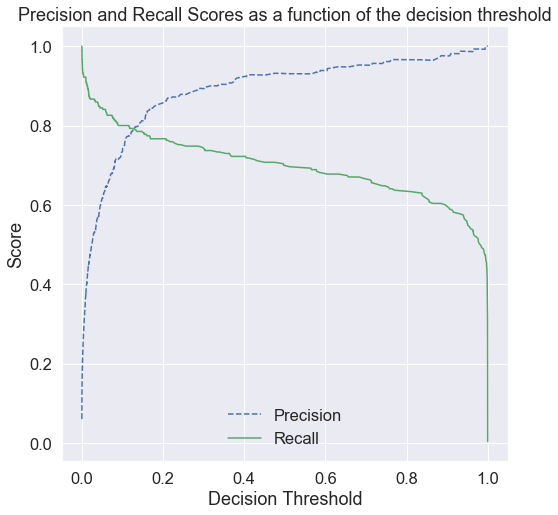

In [84]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

__ROC Curve__

In [85]:
def plot_ROC_AUC(y, y_pred_prob):
    
    fig, ax = plt.subplots(figsize = (16,8))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, thre = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    #ax.figure(figsize = (8,8))
    ax.plot(fpr, tpr)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([0.0, 1.05])
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')

    n=10
    for i, threshold in enumerate(thre):
        if i % n == 0:
            ax.annotate(threshold.round(decimals=2), (fpr[i],tpr[i]))

    print(roc_auc_score(y, y_pred_prob));

0.9734812517548562


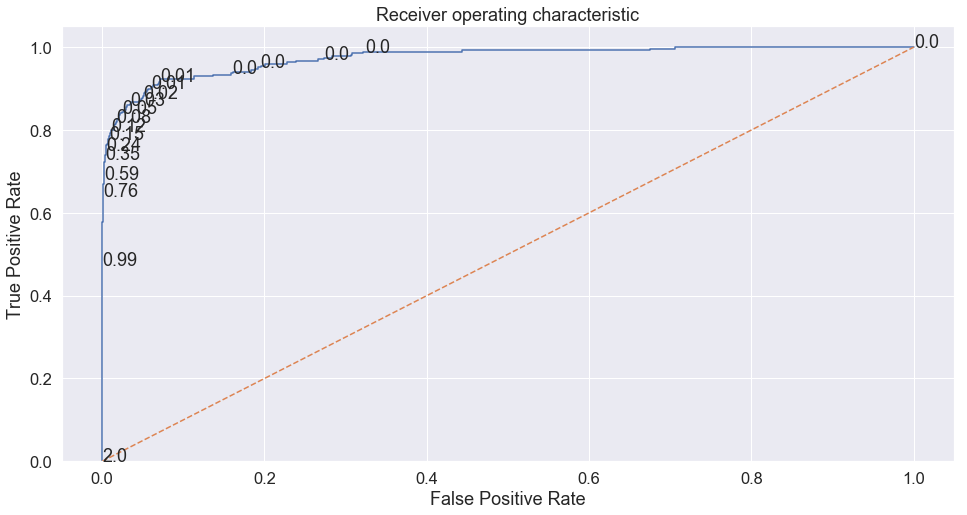

In [86]:
y_test_pred_prob=CV_xgbModel.predict_proba(X_test)
y_test_pred_prob_1 = y_test_pred_prob[:, 1]
plot_ROC_AUC(y_test, y_test_pred_prob_1)

__Check Accuracy with new threshold__

In [87]:
for thre in np.arange(0.1, 0.8, 0.01) :
    print(thre, " : ", f1_score(y_test,binarize(y_test_pred_prob, thre)[:,1]))

0.1  :  0.7659574468085106
0.11  :  0.7868852459016393
0.12  :  0.7853211009174312
0.13  :  0.7918215613382898
0.13999999999999999  :  0.7925233644859814
0.14999999999999997  :  0.7962264150943397
0.15999999999999998  :  0.8023032629558541
0.16999999999999998  :  0.8038834951456312
0.17999999999999997  :  0.8070175438596491
0.18999999999999995  :  0.80859375
0.19999999999999996  :  0.8101761252446184
0.20999999999999996  :  0.8126232741617356
0.21999999999999995  :  0.8118811881188118
0.22999999999999995  :  0.8071570576540755
0.23999999999999994  :  0.810379241516966
0.24999999999999992  :  0.8079999999999999
0.2599999999999999  :  0.8096192384769538
0.2699999999999999  :  0.8112449799196787
0.2799999999999999  :  0.8128772635814888
0.2899999999999999  :  0.8121212121212122
0.29999999999999993  :  0.8097165991902834
0.30999999999999994  :  0.8105906313645621
0.3199999999999999  :  0.8081632653061224
0.32999999999999985  :  0.8081632653061224
0.33999999999999986  :  0.8073770491803279


In [88]:
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_test_pred_prob_bin_1 = binarize(y_test_pred_prob, 0.58)[:,1]
y_test_pred_prob_bin_1


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [89]:
f1_score(y_test,y_test_pred_prob_bin_1)

0.7880085653104925

In [90]:
print(classification_report(y_test,y_test_pred_prob_bin_1,digits=4))

              precision    recall  f1-score   support

           0     0.9854    0.9978    0.9915      5804
           1     0.9340    0.6815    0.7880       270

   micro avg     0.9837    0.9837    0.9837      6074
   macro avg     0.9597    0.8396    0.8898      6074
weighted avg     0.9831    0.9837    0.9825      6074



[[5791   13]
 [  86  184]]


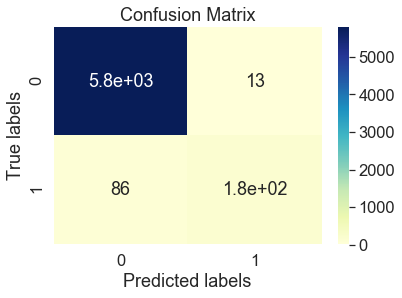

In [91]:
plotConfusionMatrix(y_test,y_test_pred_prob_bin_1)

## Run the model on actual test data

In [92]:
#Load test data
bankruptcyData_test=pd.read_csv("/Users/samyam/Documents/Samya/Insofe/insofe/CSE7305c_CUTe_ProblemDescription_and_Dataset/test.csv",
                             na_values=["NA"])
print("The number of Rows in the Income Group data set  ="+str(bankruptcyData_test.shape[0]))
print("The number of Columns in the Income Group data set =" +str(bankruptcyData_test.shape[1]))


The number of Rows in the Income Group data set  =6451
The number of Columns in the Income Group data set =65


In [93]:
bankruptcyData_test.head(10)

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,36554,0.200550,0.37951,0.396410,2.04720,32.351,0.388250,0.249760,1.330500,1.13890,...,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,36555,0.009020,0.63202,0.053735,1.12630,-37.842,0.000000,0.014434,0.582230,1.33320,...,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.5603
2,36556,0.124080,0.83837,0.142040,1.16940,-91.883,0.000000,0.153280,0.192790,2.11560,...,989.4100,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.630,2.5236,107.6700
3,36557,0.203930,0.56037,0.134950,1.24080,3.158,0.000000,0.242910,0.784520,2.27060,...,711.8500,0.107700,0.463860,0.89419,0.000000,24.9790,10.7670,90.080,4.0519,7.4525
4,36558,-0.054623,0.92857,-0.026927,0.94263,-87.724,-0.054623,-0.054623,0.074796,0.92301,...,-1693.2000,-0.083417,-0.786480,1.08340,6.611400,4.7055,3.1662,226.760,1.6096,1.3551
5,36559,0.140900,0.75560,0.338860,1.63880,-11.094,0.367620,0.140900,0.323440,1.05080,...,8185.6000,0.048331,0.576540,0.95167,0.921160,6.2170,7.8531,75.444,4.8380,19.6410
6,36560,0.013079,0.75841,-0.060128,0.90444,-58.080,0.069955,0.012298,0.299580,0.99307,...,-1116.6000,-0.006983,0.057565,1.00700,0.568570,7.3493,11.7850,91.453,3.9911,5.8280
7,36561,0.124460,0.41949,0.438150,2.04450,14.774,0.017406,0.124460,1.383900,3.05980,...,1019.0000,0.046639,0.214400,0.95959,0.000000,9.6667,10.1840,50.040,7.2942,21.4930
8,36562,0.046426,0.62672,0.074912,1.11950,-44.598,0.184330,0.059757,0.528110,1.02220,...,4230.4000,0.021671,0.140270,0.97833,0.000000,7.1736,25.1090,60.611,6.0220,12.6490
9,36563,-0.080617,0.90597,-0.097908,0.89193,-37.659,-0.289030,-0.080617,0.087716,0.97332,...,-4118.3000,-0.027407,-1.014500,1.02740,0.000000,16.2470,3.6562,139.290,2.6204,12.3680


In [94]:
getNullCountPerAttribute(bankruptcyData_test)

,total_missing,perc_missing
Attr37,2743,42.520539
Attr21,853,13.222756
Attr27,407,6.309099
Attr60,305,4.727949
Attr45,304,4.712448
Attr24,128,1.984188
Attr64,110,1.705162
Attr54,110,1.705162
Attr53,110,1.705162
Attr28,110,1.705162


In [95]:
bankruptcyData_test_1 = bankruptcyData_test.drop(['ID', 'Attr37','Attr7', 'Attr18', 'Attr14', 'Attr43', 'Attr20', 'Attr44', 'Attr49', 
                                          'Attr19', 'Attr42', 'Attr13','Attr16', 'Attr17', 'Attr63', 'Attr8',
                                          'Attr26', 'Attr33', 'Attr38', 'Attr10' , 'Attr2', 'Attr52', 'Attr32'], axis=1)

In [96]:
bankruptcyData_test_1.dtypes

Attr1     float64
Attr3     float64
Attr4     float64
Attr5     float64
Attr6     float64
Attr9     float64
Attr11    float64
Attr12    float64
Attr15    float64
Attr21    float64
Attr22    float64
Attr23    float64
Attr24    float64
Attr25    float64
Attr27    float64
Attr28    float64
Attr29    float64
Attr30    float64
Attr31    float64
Attr34    float64
Attr35    float64
Attr36    float64
Attr39    float64
Attr40    float64
Attr41    float64
Attr45    float64
Attr46    float64
Attr47    float64
Attr48    float64
Attr50    float64
Attr51    float64
Attr53    float64
Attr54    float64
Attr55    float64
Attr56    float64
Attr57    float64
Attr58    float64
Attr59    float64
Attr60    float64
Attr61    float64
Attr62    float64
Attr64    float64
dtype: object

In [97]:
bankruptcyData_test_1.head()

,Attr1,Attr3,Attr4,Attr5,Attr6,Attr9,Attr11,Attr12,Attr15,Attr21,...,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64
0,0.200550,0.396410,2.04720,32.351,0.388250,1.13890,0.249760,0.659800,497.42,1.2479,...,2.24800,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,7.4277
1,0.009020,0.053735,1.12630,-37.842,0.000000,1.33320,0.043162,0.033921,4443.70,1.0752,...,0.94760,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,2.5603
2,0.124080,0.142040,1.16940,-91.883,0.000000,2.11560,0.184540,0.182840,1918.10,1.5866,...,8.22600,989.4100,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.630,107.6700
3,0.203930,0.134950,1.24080,3.158,0.000000,2.27060,0.249910,0.433470,769.91,1.7474,...,1.44290,711.8500,0.107700,0.463860,0.89419,0.000000,24.9790,10.7670,90.080,7.4525
4,-0.054623,-0.026927,0.94263,-87.724,-0.054623,0.92301,-0.054623,-0.116370,-21123.00,NaN,...,0.94816,-1693.2000,-0.083417,-0.786480,1.08340,6.611400,4.7055,3.1662,226.760,1.3551


In [98]:
y_test_actual_pred = CV_xgbModel.predict_proba(bankruptcyData_test_1)
y_test_actual_pred_1 = pd.DataFrame(y_test_actual_pred[:,1])
y_test_actual_pred_1['prediction'] = y_test_actual_pred_1.apply(lambda row: 0 if row[0] < 0.5 else 1, axis=1)
y_test_op = pd.DataFrame(y_test_actual_pred_1)
y_test_op.head(10)

,0,prediction
0,0.000019,0
1,0.000041,0
2,0.000787,0
3,0.000118,0
4,0.000041,0
5,0.000001,0
6,0.000011,0
7,0.000542,0
8,0.000293,0
9,0.000016,0


In [99]:
y_test_op['prediction'].value_counts()
(y_test_op["prediction"].value_counts()/y_test_op.shape[0])*100

0    6200
1     251
Name: prediction, dtype: int64

0    96.10913
1     3.89087
Name: prediction, dtype: float64

In [100]:
y_test_op_1 = pd.concat([bankruptcyData_test[['ID']], y_test_op], axis=1)
y_test_op_1.head()

,ID,0,prediction
0,36554,0.000019,0
1,36555,0.000041,0
2,36556,0.000787,0
3,36557,0.000118,0
4,36558,0.000041,0


In [101]:
y_test_op_1[['ID', 'prediction']].to_csv(path_or_buf="/Users/samyam/Documents/Samya/Insofe/insofe/CSE7305c_CUTe_ProblemDescription_and_Dataset/Output/submission.csv", index=False)


## Changes

1. Playing with Gamma value to handle regularization. Tried with Gamma=.2, got even more over fitted.


__TODO : Improvements__



## Backup